In [4]:
import pandas as pd;
data=pd.read_csv('/home/daniel/Downloads/Advertising.csv', index_col=0);
#The index_col argument sets the 1st (0th)column as the index

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.shape

(200, 4)

In [7]:
#Sales are to be predicted based on TV, radio, and news dollars


In [9]:
%matplotlib inline
import seaborn as sb

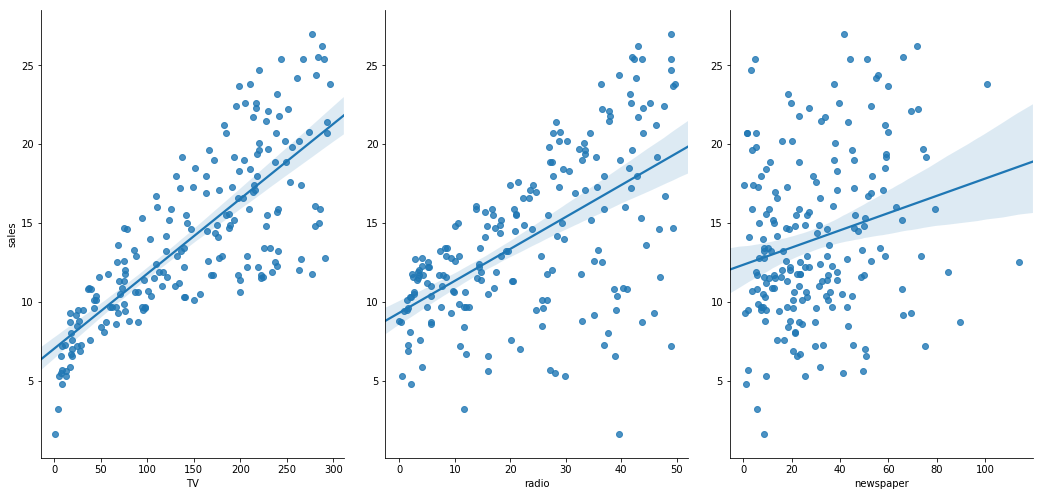

In [13]:
#This allows us to plot all the features to their target in one line
sb.pairplot(data, x_vars=['TV', "radio", "newspaper"], y_vars="sales", size=7, aspect=0.7, kind='reg');
#kind='reg' gives us the line of best fit and the 95% confidence band

In [15]:

#We now have a dataframe with all the features
feature_cols=['TV', 'radio', 'newspaper']
x=data[feature_cols]
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [16]:
y=data['sales']
#Vector with all the y data

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [20]:
#Here we are splitting X and Y into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=1)


In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [27]:

from sklearn.linear_model import LinearRegression

#Instantiates the model
linearReg=LinearRegression()

#Fits it to our data
linearReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:

#We can now print both the intercept and the weights of the coefficients
print(linearReg.intercept_)
print (linearReg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [31]:
#Here we are making predictions on the testing set
yPred=linearReg.predict(x_test)

In [33]:
import numpy as np
from sklearn import metrics

#How much error do we have?
print(np.sqrt(metrics.mean_squared_error(y_test, yPred)))

1.4046514230328953
